# FrozenLake8x8

## Introduction

I have solved FrozenLake8x8 problem by using "Value Iteration" algorithm. Firstly, I was trying to resolve the task using the "Q-learning" algorithm. This algorithm worked well with the 4x4 version of the FrozenLake problem, but it was less effective with the 8x8 version. It might be related to the fact, that in the case of that environment we know all probabilities a priori. In these cases, dynamic programming algorithms, such as "Value Iteration" are able to perform well. "Q-learning" is based on learning by doing and it can optimize policy without knowing the whole model. It occurred that it wasn't neceserry in that game. 

I have found on the internet that other people have also resolved that game by the "Value Iteration" algorithm. However, in the algorithms that I have found online, there were errors and some imperfections. The best model that I have found on the internet is performing with 75% of success. In my case, I have achieved a result of approximately 86% of success.

## Solution

### Load libraries

In [1]:
import numpy as np
import gym
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

### "Value Iteration" algorithm  - elements

#### Algorithm elements - enviroment

In [2]:
env = gym.make('FrozenLake8x8-v1')
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Note: 'FrozenLake8x8-v0' is no longer available in the newest version of the gym library. That's why for resolving the task I have been using 'FrozenLake8x8-v1'.

#### Algorithm elements - actions

In [3]:
count_actions = env.action_space.n
print("Action space:", count_actions, "possible actions")

Action space: 4 possible actions


- 0 - Left
- 1 - Down
- 2 - Top
- 3 - Right

#### Algorithm elements - states

In [4]:
count_states = env.observation_space.n
print("State space:", count_states, "diffrent states.")

State space: 64 diffrent states.


Each state represents a different cell of the FrozenLake8x8 environment.

#### Algorithm elements - Transition Probability

In [5]:
env.P[0]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

Each element of the dictionary represents different actions from the current state (0 - initial state). 

Each value of the dictionary represents different states that can be achieved after choosing such action. 

Each element of the list inside the value of the dictionary represents:

- Probability of transitioning into the state
- Next state
- Reward
- Is the game terminated?

## "Value Iteration" algorithm - implementation

Run "Value Iteration" algorithm to get the policy for playing the game

In [6]:
def value_iteration_policy(env, max_iterations=1000, discount_factor=0.9, count_states=64, count_actions=4):
    stateValue = [0 for i in range(count_states)] # Init empty action-state value list to be filled in
    policy = [0 for i in range(count_states)] # Init empty policy list to be filled in
    newStateValue = stateValue.copy() 
    for i in range(max_iterations): # Go through iterations
        for state in range(count_states):  # Go through all states
            action_values = [] # Empty vector for all action-state values from the current state   
            for action in range(count_actions): # Go through avalivable actions from the current state 
                state_value = 0 # Init cumulutive variable for the action-state values
                for i in range(len(env.P[state][action])):  # Go through Transition Probability in the chosen step
                    prob, next_state, reward, done = env.P[state][action][i] # Get Transition Probability values
                    state_action_value = prob * (reward + discount_factor*stateValue[next_state]) # Action-state value formula
                    state_value += state_action_value # Add action-state value by the value from the current action
                action_values.append(state_value) # Append the value of each action
            best_action = np.argmax(np.asarray(action_values)) # Choose the action which gives the maximum value
            newStateValue[state] = action_values[best_action] # Update the value of the state
            policy[state] = best_action # Update policy list with the best action
        stateValue = newStateValue.copy() # Overwrite action-state value list
    return policy

Run the game multiple times to check how many sucessess and steps to win can be achieved by the chosen policy.

In [7]:
def run_multiple_games(env, policy, episodes=1000):
    successes = 0 # Init var for counting successes
    steps_list = [] # Init list for counting steps in each scenario
    for episode in range(episodes): # Go through all episodes
        observation = env.reset() # Generate new game/enviroment. It returns 0 state
        steps=0
        while True:      
            action = policy[observation] # Take trained action from policy list
            observation, reward, done, _ = env.step(action) # Perform action in enviroment
            steps+=1 # Calculate step
            if done and reward == 1: # Game ended with sucess
                successes += 1
                steps_list.append(steps)
                break
            elif done and reward == 0: # Game over
                break
    return episodes, successes, steps_list

## "Value Iteration" algorithm - tuning a discount factor parameter

### Checking how the algorithm performs, when a different value of discount factor parameter is defined

In [8]:
labmda_values = np.arange(88,100,1)
successes_list = []
steps_list = []

for i in range(len(labmda_values)):
    policy = value_iteration_policy(env, max_iterations=4000,
                                    discount_factor=labmda_values[i]/100,
                                    count_states=count_states,
                                    count_actions=count_actions)
    
    episodes, successes, steps = run_multiple_games(env, policy, episodes=100)
    successes_list.append(successes)
    steps_list.append(steps)    

### Successes per discount factor

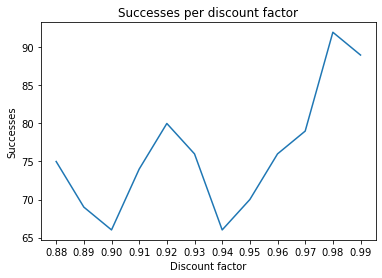

In [9]:
plt.plot(labmda_values/100, successes_list)
plt.title("Successes per discount factor")
plt.xlabel("Discount factor")
plt.ylabel("Successes")
plt.xticks(labmda_values/100)
plt.show()

In [10]:
best_lambda = labmda_values[successes_list.index(max(successes_list))]/100
print("Algorithm best performs while discount factor has value: ", best_lambda)

Algorithm best performs while discount factor has value:  0.98


### Steps for win per discount factor

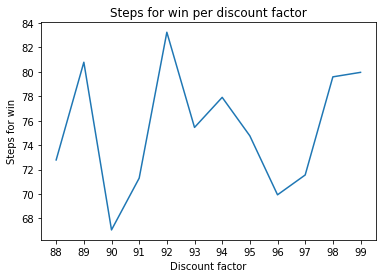

In [11]:
steps_list_mean = [np.mean([el for el in sublist]) for sublist in steps_list]
plt.plot(labmda_values, steps_list_mean)
plt.title("Steps for win per discount factor")
plt.xlabel("Discount factor")
plt.ylabel("Steps for win")
plt.xticks(labmda_values)
plt.show()

There is no clear trend in the above graph that can lead to additional findings. 

## "Value Iteration" algorithm - final solution

#### Run final model

In [12]:
policy = value_iteration_policy(env, max_iterations=100000,
                                discount_factor=best_lambda,
                                count_states=count_states,
                                count_actions=count_actions)

#### Chosen policy

In [13]:
policy[0:10]

[3, 2, 2, 2, 2, 2, 2, 2, 3, 3]

#### Result of running chosen policy 10000 times

In [14]:
episodes, successes, steps_list = run_multiple_games(env, policy, episodes=10000)

print("The game has been run", episodes, "times")
print("Successes: ", successes)
print("Losses: ", episodes - successes)
print("% of sucesses: ", (successes/episodes) * 100, "%")
print("Average steps to win: ", np.mean(steps_list).round())

The game has been run 10000 times
Successes:  8632
Losses:  1368
% of sucesses:  86.32 %
Average steps to win:  81.0


## Check how the policy works in practice

In [15]:
def play_sample_game(env, policy):
    observation = env.reset()
    while True:
        clear_output(wait=True)
        action = policy[observation]
        observation, reward, done, info = env.step(action)
        env.render()
        sleep(.1)
        if done:
            break

In [16]:
play_sample_game(env, policy)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## Bibliography

- Reinforcement Learning: An Introduction. Second edition. Richard S. Sutton and Andrew G. Barto
- Reinforcement Q-Learning from Scratch in Python with OpenAI Gym [https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/](https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/)
- Value Iteration vs. Q-Learning Algorithm in Python Step-By-Step [https://automaticaddison.com/value-iteration-vs-q-learning-algorithm-in-python-step-by-step/](https://automaticaddison.com/value-iteration-vs-q-learning-algorithm-in-python-step-by-step/)
- Value Iteration to solve OpenAI Gym’s FrozenLake [https://towardsdatascience.com/value-iteration-to-solve-openai-gyms-frozenlake-6c5e7bf0a64d](https://towardsdatascience.com/value-iteration-to-solve-openai-gyms-frozenlake-6c5e7bf0a64d)
- Solving the FrozenLake environment from OpenAI gym using Value Iteration [https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438](https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438)